In [1]:
#%pylab inline
from FastCDF import fastCDF
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np

## FastCDF python usage example 

We start with a normal distribution in 2 dimensions. 
### FastCDF
This is closely related to a fast histogramming function in that it counts samples in cells and gives the cumulative sum on a regular grid.

In [2]:
mean = (.0, .5)
cov = [[1, 0], [0, 1]]
x = np.random.multivariate_normal(mean, cov, (300)).T
x.shape

(2, 300)

In [3]:
nb = 1000000
#x = np.random.normal(size=(2,nb));
mean = (-1, 1)
cov = [[1, 0], [0, 1]]
x = np.random.multivariate_normal(mean, cov, (nb)).T

# y =1 for simple CDF
y =  np.ones([nb])

# define the grid (same in both dimension)
Ng = 100
xm = 4
xg = np.linspace(-xm,xm, Ng)
yg = np.linspace(-xm*0.8,xm, Ng)
zg = [xg,yg]
cdf = fastCDF(x,zg,y).reshape(Ng,Ng)

In [4]:
print(cdf.shape)
np.max(cdf), cdf[0,0]

(100, 100)


(0.9986750000000003, 1e-06)

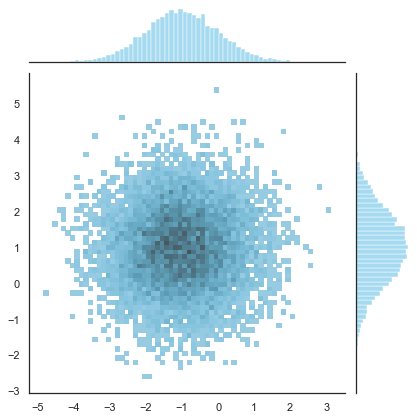

In [5]:
#fig = plt.figure(figsize=(8,8))
#ax = fig.add_subplot()
#plt.plot(x[0,:], x[1,:],'.',alpha=.5,ms=1, markevery=100);
#ax.set_aspect("equal")
ns = 100
sns.set(style="white", color_codes=True)
sns.jointplot(x=x[0,::ns], y=x[1,::ns], kind='hist', color="skyblue");

#ax.set_aspect("equal");

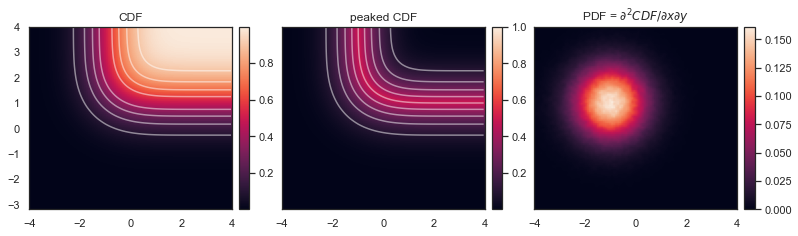

In [6]:
grad = np.gradient(cdf,xg, axis=0)
der2  = np.gradient(grad.reshape(Ng,Ng),yg, axis=1)
ga = der2
from mpl_toolkits.axes_grid1 import ImageGrid
from mpl_toolkits.axes_grid1 import AxesGrid
plt.rcParams["mpl_toolkits.legacy_colorbar"] = False
pcdf = np.minimum(cdf,1-cdf) # peaked CDF
fig = plt.figure(figsize=(13,6))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 3), axes_pad=0.45,cbar_mode="each",cbar_location="right",cbar_pad=0.1)
cc = grid[0].imshow(cdf,origin='lower', extent=[xg.min(),xg.max(),yg.min(),yg.max()])
grid[1].contour(cdf,origin='lower', extent=[xg.min(),xg.max(),yg.min(),yg.max()],colors="white",alpha=.5,
                    levels=np.linspace(0,1,11))
grid[0].set_title("CDF")
grid.cbar_axes[0].colorbar(cc)
#fig.colorbar(cc)
c = grid[1].imshow(pcdf,origin='lower', extent=[xg.min(),xg.max(),yg.min(),yg.max()],vmax=1)
grid[0].contour(pcdf,origin='lower', extent=[xg.min(),xg.max(),yg.min(),yg.max()],colors="white",alpha=.5,
                    levels=np.linspace(0,1,11))
grid[1].set_title("peaked CDF")
grid.cbar_axes[1].colorbar(c)
ccc = grid[2].imshow(ga,origin='lower', extent=[xg.min(),xg.max(),yg.min(),yg.max()])
grid[2].set_title(r"PDF = $\partial^2 CDF/\partial x \partial y$")
grid.cbar_axes[2].colorbar(ccc)
#fig.colorbar(location='right')
plt.show()

We plot the CDF, the peaked CDF $\equiv min(CDF(x,y), 1-CDF(x,y))$, and $\partial^2 CDF/\partial x \partial CDF/\partial y$ with contour levels at 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0.

### FastCDFOnSample

In [7]:
from FastCDF import fastCDFOnSample
cdfos = fastCDFOnSample(x,y)

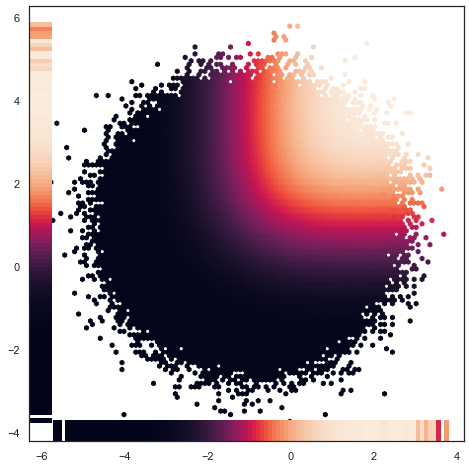

In [8]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.set_aspect("equal")
ns = 1
plt.hexbin(x[0,::ns], x[1,::ns], C=cdfos[::ns],marginals=True,
        reduce_C_function=np.max);

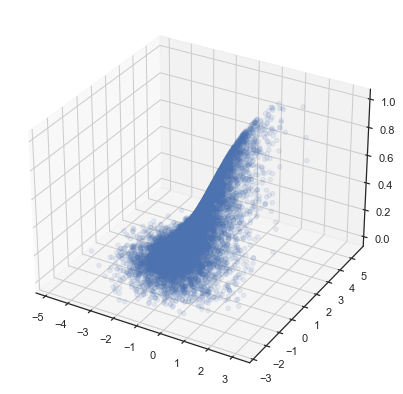

In [9]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
ns = 100
ax.scatter(x[0,::ns], x[1,::ns], cdfos[::ns],'.',alpha=.1);

## Check performance

In [10]:
def gridECDF2D(xx,yy,xgi,ygi):
    h2d, xe, ye =  np.histogram2d(xx,yy,bins=(np.insert(xgi, 0, np.NINF),np.insert(ygi, 0, np.NINF)))
    return np.cumsum(np.cumsum(h2d ,axis=0),axis=1)/len(xx)

cdf2 = gridECDF2D(x[1,:],x[0,:], yg, xg)


In [11]:
# %timeit cdf2 = gridECDF2D(x[0,:],x[1,:], xg, yg)
# %timeit cdf = fastCDF(x,zg,y).reshape(Ng,Ng)

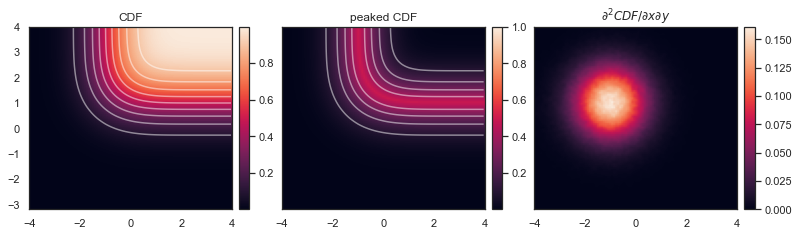

In [12]:
grad2 = np.gradient(cdf2,xg, axis=0)
der2  = np.gradient(grad2.reshape(Ng,Ng),yg, axis=1)
ga2 = der2
from mpl_toolkits.axes_grid1 import ImageGrid
from mpl_toolkits.axes_grid1 import AxesGrid
plt.rcParams["mpl_toolkits.legacy_colorbar"] = False
pcdf2 = np.minimum(cdf2,1-cdf2) # peaked CDF
fig = plt.figure(figsize=(13,6))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 3), axes_pad=0.45,cbar_mode="each",cbar_location="right",cbar_pad=0.1)
cc = grid[0].imshow(cdf2,origin='lower', extent=[xg.min(),xg.max(),yg.min(),yg.max()])
grid[0].contour(cdf2,origin='lower', extent=[xg.min(),xg.max(),yg.min(),yg.max()],colors="white",alpha=.5,
                    levels=np.linspace(0,1,11))
grid[0].set_title("CDF")
grid.cbar_axes[0].colorbar(cc)
#fig.colorbar(cc)
c = grid[1].imshow(pcdf2,origin='lower', extent=[xg.min(),xg.max(),yg.min(),yg.max()],vmax=1)
grid[1].contour(pcdf2,origin='lower', extent=[xg.min(),xg.max(),yg.min(),yg.max()],vmax=1,colors="white",alpha=.5,
                    levels=np.linspace(0,1,11))
grid[1].set_title("peaked CDF")
grid.cbar_axes[1].colorbar(c)
ccc = grid[2].imshow(ga2,origin='lower', extent=[xg.min(),xg.max(),yg.min(),yg.max()])
grid[2].set_title(r"$\partial^2 CDF/\partial x \partial y$")
grid.cbar_axes[2].colorbar(ccc)
plt.show()

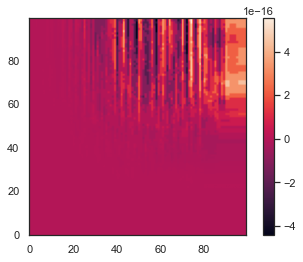

In [13]:
plt.imshow(cdf-cdf2, origin="lower")
plt.colorbar();